In [9]:
!pip install requests
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
ids = [ 6989082301, 6989010862, 6988937030, 6983379774, 6983322747, 6983264925, 6978915731, 6978805831, 
       6978693956, 6975968336, 6975872098, 6975795790, 6972753555, 6972684789, 6967835831, 
       6967747296, 6967695391, 6964948218, 6964808094, 6993967519, 6993908639, 6993846799, 
       6985972971, 6985928769, 6983559987, 6983454643, 6978588100, 6978514396, 6968078527, 
       6967998722, 6967909173, 6964688198, 6964620736, 6961708078, 6961606251, 6961496259 ]

## mengubah int menjadi str
id = list(map(str, ids))

In [3]:
import requests
import json
import logging

matches = list()

for i in id:
  match = requests.get( 'https://api.opendota.com/api/matches/{}'.format(i))
  
  data = json.loads(match.text)
  matches.append(data)


In [4]:
players = list()
for x in matches:
  for y in x['players']:
    if y['account_id'] == 355168766 or y['account_id'] == 392565237:
      players.append(y)
# matches[0]['players'][0]['account_id']

In [47]:
import pandas as pd
df = pd.json_normalize(players)
# df.index = df['match_id']
df.head()

,match_id,player_slot,ability_upgrades_arr,account_id,additional_units,assists,backpack_0,backpack_1,backpack_2,backpack_3,...,lane_pos.92.106,lane_pos.94.106,lane_pos.96.104,lane_pos.98.102,lane_pos.100.102,lane_pos.136.82,lane_pos.154.100,lane_pos.162.100,lane_pos.164.100,lane_pos.180.86
0,6989082301,132,"[5019, 343, 5632, 5019, 5019, 5022, 343, 343, ...",355168766,None,6,0,16,28,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6989010862,4,"[5496, 5495, 5494, 5494, 5494, 5497, 5494, 549...",355168766,None,4,0,0,16,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6988937030,4,"[5679, 5677, 5677, 5679, 5677, 5683, 5677, 567...",355168766,"[{'unitname': '', 'item_0': 600, 'item_1': 146...",10,0,0,14,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6983379774,132,"[5679, 5677, 5679, 5677, 5677, 5683, 5679, 567...",355168766,"[{'unitname': '', 'item_0': 600, 'item_1': 96,...",18,0,0,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6983322747,4,"[5359, 5358, 5359, 5357, 5359, 5360, 5359, 535...",355168766,None,8,38,116,0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.drop(df.columns.difference(['benchmarks.gold_per_min.pct','benchmarks.xp_per_min.pct',
                               'benchmarks.last_hits_per_min.pct','hero_damage',
                               'name','hero_damage', 'win', 'kda',
                               'tower_damage', 'teamfight_participation','duration']), 1, inplace=True)
df.head()

<ipython-input-48-3fcfd738abe0>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,hero_damage,teamfight_participation,tower_damage,name,duration,win,kda,benchmarks.gold_per_min.pct,benchmarks.xp_per_min.pct,benchmarks.last_hits_per_min.pct
0,14124,0.529412,1530,Natsumi,2340,0,1,0.100000,0.450000,0.700000
1,6417,0.454545,0,Natsumi,1870,0,1,0.150000,0.250000,0.750000
2,49199,0.833333,5028,Natsumi,2522,1,20,1.000000,0.857143,1.000000
3,103079,0.805556,4756,Natsumi,2909,1,7,1.000000,0.857143,1.000000
4,30179,0.628571,7109,Natsumi,2159,1,11,0.785714,0.857143,0.642857


In [49]:
df.rename(columns={'benchmarks.gold_per_min.pct': 'gpm', 'benchmarks.xp_per_min.pct': 'xpm', 'benchmarks.last_hits_per_min.pct': 'lh_per_min', 'win': 'result'}, inplace=True)

In [52]:
df['hero_damage'] = (df['hero_damage']-df['hero_damage'].min())/(df['hero_damage'].max()-df['hero_damage'].min())
df['tower_damage'] = (df['tower_damage']-df['tower_damage'].min())/(df['tower_damage'].max()-df['tower_damage'].min())
df['kda'] = (df['kda']-df['kda'].min())/(df['kda'].max()-df['kda'].min())

In [58]:
# map_dict = {0: "lose", 1: "win"}
df["result"] = df["result"].astype('string').replace(["0", "1"], ["lose", "win"])
df.head()

,hero_damage,teamfight_participation,tower_damage,name,duration,result,kda,gpm,xpm,lh_per_min
0,0.108337,0.529412,0.058352,Natsumi,2340,lose,0.034483,0.100000,0.450000,0.700000
1,0.031084,0.454545,0.000000,Natsumi,1870,lose,0.034483,0.150000,0.250000,0.750000
2,0.459920,0.833333,0.191762,Natsumi,2522,win,0.689655,1.000000,0.857143,1.000000
3,1.000000,0.805556,0.181388,Natsumi,2909,win,0.241379,1.000000,0.857143,1.000000
4,0.269268,0.628571,0.271129,Natsumi,2159,win,0.379310,0.785714,0.857143,0.642857


In [59]:
df.shape

(39, 10)

In [60]:
by_result = df.groupby(["result", "name"]).mean()
by_result.head

<bound method NDFrame.head of                 hero_damage  teamfight_participation  tower_damage  \
result name                                                          
lose   JACKKY      0.248608                 0.630983      0.121688   
       Natsumi     0.267478                 0.621165      0.168977   
win    JACKKY      0.336090                 0.668999      0.608877   
       Natsumi     0.454066                 0.675135      0.430892   

                   duration       kda       gpm       xpm  lh_per_min  
result name                                                            
lose   JACKKY   2671.333333  0.068966  0.643624  0.368870    0.828600  
       Natsumi  2828.000000  0.063218  0.512355  0.390463    0.755995  
win    JACKKY   2700.500000  0.349138  0.842000  0.575782    0.970779  
       Natsumi  2788.714286  0.330049  0.877551  0.767347    0.881633  >

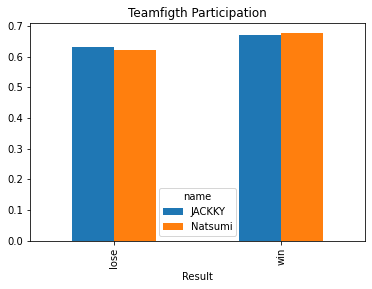

In [61]:
import matplotlib.pyplot as plt

by_result["teamfight_participation"].unstack().plot(kind="bar")

# Add title and axis labels
plt.title('Teamfigth Participation')
plt.xlabel('Result')

# Show the plot
plt.show()

<AxesSubplot:xlabel='result'>

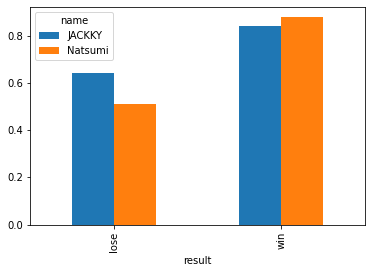

In [65]:
by_result["gpm"].unstack().plot(kind="bar")

<AxesSubplot:xlabel='result'>

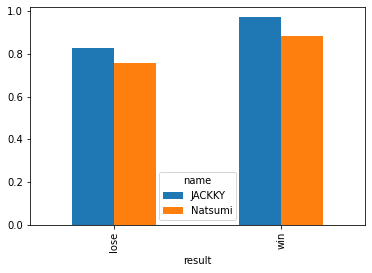

In [66]:
by_result["lh_per_min"].unstack().plot(kind="bar")

In [67]:
((by_result["kda"]+by_result["tower_damage"]+by_result["hero_damage"])/by_result["gpm"])

result  name   
lose    JACKKY     0.682481
        Natsumi    0.975250
win     JACKKY     1.536941
        Natsumi    1.384544
dtype: float64

In [68]:
simple_efficiency = ((by_result["kda"]+by_result["gpm"]+by_result["xpm"]+by_result["tower_damage"]+by_result["hero_damage"]+by_result["teamfight_participation"])/by_result["duration"]) * 100
simple_efficiency

result  name   
lose    JACKKY     0.077966
        Natsumi    0.071558
win     JACKKY     0.125195
        Natsumi    0.126762
dtype: float64

In [62]:
data = by_result.drop(columns=["duration"])
data.head

<bound method NDFrame.head of                 hero_damage  teamfight_participation  tower_damage       kda  \
result name                                                                    
lose   JACKKY      0.248608                 0.630983      0.121688  0.068966   
       Natsumi     0.267478                 0.621165      0.168977  0.063218   
win    JACKKY      0.336090                 0.668999      0.608877  0.349138   
       Natsumi     0.454066                 0.675135      0.430892  0.330049   

                     gpm       xpm  lh_per_min  
result name                                     
lose   JACKKY   0.643624  0.368870    0.828600  
       Natsumi  0.512355  0.390463    0.755995  
win    JACKKY   0.842000  0.575782    0.970779  
       Natsumi  0.877551  0.767347    0.881633  >

In [63]:
import plotly.graph_objs as go

# Define the traces
traces = []
for name in data.index:
    traces.append(go.Scatterpolar(
        r=data.loc[name].values,
        theta=data.columns,
        fill='toself',
        name=f"{name[0]} - {name[1]}"
    ))

# Define the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(data.max())]
        )
    ),
    showlegend=True
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()

In [ ]:
# df["purchase.smoke_of_deceit"] = df["purchase.smoke_of_deceit"].fillna(0).astype("int64")
# df["match_id"] = df['match_id'].astype('string')
# df.info()

In [64]:
import plotly.graph_objs as go
import pandas as pd

# Define the data
# data = pd.DataFrame({
#     ('lose', 'JACKKY'): [0.55, 0.65, 0.4, 0.6, 0.3, 0.55, 0.7],
#     ('lose', 'Natsumi'): [0.54, 0.85, 0.75, 0.75, 0.5, 0.54, 0.67],
#     ('win', 'JACKKY'): [0.8, 0.75, 0.35, 0.82, 0.83, 0.8, 1.0],
#     ('win', 'Natsumi'): [0.83, 0.95, 0.77, 0.65, 0.75, 0.9, 1.0]
# }, index=['hero_damage', 'teamfight_participation', 'tower_damage', 'kda', 'gpm', 'xpm', 'lh_per_min']).T

# # Define the traces
# traces = []
# for name in data.index:
#     traces.append(go.Scatterpolar(
#         r=data.loc[name].values,
#         theta=data.columns,
#         fill='toself',
#         name=f"{name[0]} - {name[1]}"
#     ))

# # Define the layout
# layout = go.Layout(
#     polar=dict(
#         radialaxis=dict(
#             visible=True,
#             range=[0, max(data.max())]
#         )
#     ),
#     showlegend=True
# )

# # Create the figure
# fig = go.Figure(data=traces, layout=layout)

# # Show the plot
# fig.show()
